In [1]:
#include "gsl/gsl_sf_bessel.h"
#include <iostream>
#include <vector>
#include <chrono>
#include <string>
#include <fstream>

#include "xtl/xbase64.hpp"
#include "xeus/xjson.hpp"
using namespace std;

In [2]:
.L libgsl.so

In [3]:
double x = 5.0;
double y = gsl_sf_bessel_J0 (x);
y

-0.177597

In [4]:
namespace im
{
    struct image
    {   
        inline image(const std::string& filename)
        {
            std::ifstream fin(filename, std::ios::binary);   
            m_buffer << fin.rdbuf();
        }
        
        std::stringstream m_buffer;
    };
    
    xeus::xjson mime_bundle_repr(const image& i)
    {
        auto bundle = xeus::xjson::object();
        bundle["image/png"] = xtl::base64encode(i.m_buffer.str());
        return bundle;
    }
}

In [5]:
system("gnuplot \"plotFiles/plotSinFunction.plt\"")

0

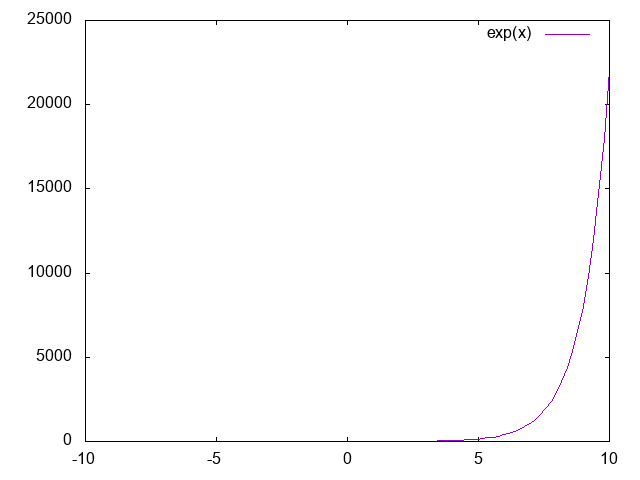

In [6]:
im::image testImage("images/best.png");
testImage